# Table of contents

- Importing libraries
- Data Cleaning
- Exploring the data visually
- Regression analysis
- Removing outliers and regression testing again

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\alexa\OneDrive\Documents\data analytics\Achievement 6'

In [4]:
df_voter = pd.read_csv(os.path.join(path, 'Main', 'idea_voter_clean.csv'), index_col = False)

# Data cleaning

In [5]:
df_voter.columns

Index(['Country', 'Election type', 'Year', 'Voter Turnout', 'Total vote',
       'Registration', 'VAP Turnout', 'Voting age population', 'Population',
       'Invalid votes', 'Compulsory voting'],
      dtype='object')

In [6]:
df_voter.head()

,Country,Election type,Year,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting
0,Afghanistan,Parliamentary,2018,0.4523,4000000,8843151,0.2181,18340292,34940837,0.0000,No
1,Afghanistan,Parliamentary,2010,0.3514,4216594,12000000,0.2971,14191908,29120727,0.0442,No
2,Afghanistan,Parliamentary,2005,0.4937,6406615,12977336,0.5171,12389532,26334702,0.0510,No
3,Afghanistan,Presidential,2019,0.1900,1824401,9600000,0.0963,18938369,35780458,0.0000,No
4,Afghanistan,Presidential,2014,0.3890,8109493,20845988,0.5003,16208255,31822848,0.0168,No


In [7]:
df_voter.shape

(1626, 11)

In [8]:
#checking vote missing values
df_voter.isnull().sum()

Country                  0
Election type            0
Year                     0
Voter Turnout            0
Total vote               0
Registration             0
VAP Turnout              0
Voting age population    0
Population               0
Invalid votes            0
Compulsory voting        6
dtype: int64

As mentionned it is normal since no data inputting is possible for missing voter data

In [9]:
# check for any duplicates = we do not have any
df_subset_dups = df_voter[df_voter.duplicated()]

<AxesSubplot:xlabel='Voter Turnout', ylabel='Count'>

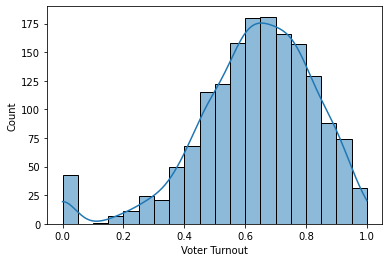

In [10]:
#check for extreme values = do not see anything out of range. We see turn outs between 60%/80%!!
sns.histplot(df_voter['Voter Turnout'], bins=20, kde = True)

In [11]:
df_voter.describe()

,Year,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes
count,1626.000000,1626.000000,1.626000e+03,1.626000e+03,1626.000000,1.626000e+03,1.626000e+03,1626.000000
mean,2011.023985,0.634896,1.109849e+07,1.727405e+07,0.584340,1.847679e+07,2.718160e+07,0.028189
std,6.424763,0.194109,3.201175e+07,4.890783e+07,0.209917,5.025237e+07,7.426812e+07,0.041189
min,2000.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2006.000000,0.528775,6.360628e+05,1.129204e+06,0.466000,1.427274e+06,2.051522e+06,0.003000
50%,2011.000000,0.652500,2.746500e+06,4.658034e+06,0.607150,4.961379e+06,7.760064e+06,0.016000
75%,2016.000000,0.768725,8.345066e+06,1.393671e+07,0.725500,1.511554e+07,2.343457e+07,0.036925
max,2022.000000,0.999000,6.136563e+08,9.105121e+08,1.215600,8.919343e+08,1.311559e+09,0.417000


# Exploring the data visually 

Hypothesis: there are less voters as the years progress

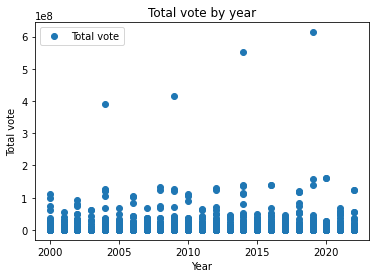

In [54]:
# Create a scatterplot using matplotlib for another look at how the voting total changes by year
df_voter.plot(x = 'Year', y='Total vote',style='o') 
plt.title('Total vote by year')  
plt.xlabel('Year')  
plt.ylabel('Total vote')  
plt.show()

In [55]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_voter['Year'].values.reshape(-1,1)
y = df_voter['Total vote'].values.reshape(-1,1)

In [56]:
X

array([[2018],
       [2010],
       [2005],
       ...,
       [2013],
       [2008],
       [2002]], dtype=int64)

In [57]:
y

array([[4000000],
       [4216594],
       [6406615],
       ...,
       [3480047],
       [2514750],
       [3046891]], dtype=int64)

In [58]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [59]:
# Create a regression object.
regression = LinearRegression()

In [60]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

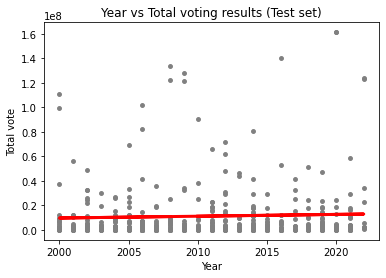

In [62]:
# Create a plot that shows the regression line from the model of the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs Total voting results (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Total vote')
plot_test.show()

The regression line looks to be in a a straight line till mid point with a slight rise. Which means we have a good linear relationship. Although we have a lot of outliers.

In [49]:
# Create RMSE and R2 score
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [50]:
# Print slope, MSE and R2 score
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.96678455e-09]]
Mean squared error:  40.150372326169446
R2 score:  -0.0028669593707661978


In [51]:
y_predicted

array([[2011.13184543],
       [2011.18606559],
       [2011.11326825],
       [2011.09343692],
       [2011.1520088 ],
       [2011.70099559],
       [2011.09252556],
       [2011.09414417],
       [2011.09241316],
       [2011.09340524],
       [2011.20232978],
       [2011.09309675],
       [2011.09768189],
       [2011.10529655],
       [2011.09349853],
       [2011.09713941],
       [2011.10188844],
       [2011.09270493],
       [2011.09339254],
       [2011.10277216],
       [2011.09213588],
       [2011.159258  ],
       [2011.11714513],
       [2011.10860472],
       [2011.16688612],
       [2011.11094859],
       [2011.09228715],
       [2011.09237051],
       [2011.11330766],
       [2011.10074434],
       [2011.09221771],
       [2011.10712465],
       [2011.38463651],
       [2011.09237763],
       [2011.1499215 ],
       [2011.09305667],
       [2011.21886176],
       [2011.09338101],
       [2011.09529037],
       [2011.10598339],
       [2011.09525815],
       [2011.134

In [52]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2010,2011.131845
1,2011,2011.186066
2,2015,2011.113268
3,2007,2011.093437
4,2001,2011.152009
5,2008,2011.700996
6,2018,2011.092526
7,2001,2011.094144
8,2007,2011.092413
9,2011,2011.093405


Since the slope is 4.96 this indicates we have a positive relationship between the years and the voter turnout. The SME though is 40 therefore the representation isn't accurate. The R2 results are -0.02 which doesn't bode well for this test.

# Compare how the regression fits the training set

In [25]:
#time to predict
y_predicted_train = regression.predict(X_train)

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[147474.76739804]]
Mean squared error:  1237917572933225.0
R2 score:  0.0007324753958449781


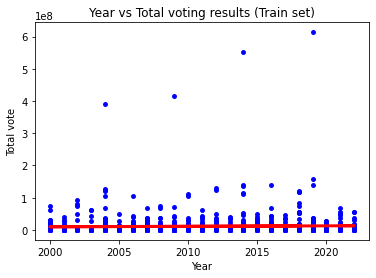

In [28]:
# Visual training results

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year vs Total voting results (Train set)')
plot_test.xlabel('Year')
plot_test.ylabel('Total vote')
plot_test.show()

The training results: the slope is a lot higher than the test, the SME results show that the are really far from the line and the R2 shows that it is a poor fit. Visually the line seems quite linear with no incline.

In [29]:
#seeing if removing outliers improves results/ since the outliers are between 3-4 the mean is 3.201175e+07 so took that number
df_test = df_voter[df_voter['Total vote'] <=3.201175e+07] 

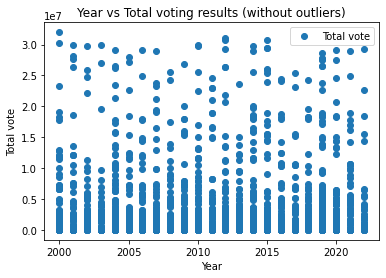

In [31]:
df_test.plot(x = 'Year', y='Total vote', style='o')  
plt.title('Year vs Total voting results (without outliers)')  
plt.xlabel('Year')  
plt.ylabel('Total vote')  
plt.show()

now we see a better distibution throught the years. as of 2004 we see more elections taking place but the total vote seems to fluxuate a lot

In [32]:
# Reshape again.
X_2 = df_test['Year'].values.reshape(-1,1)
y_2 = df_test['Total vote'].values.reshape(-1,1)

In [33]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [34]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [35]:
#prediction take 2!
y_predicted_2 = regression.predict(X_test_2)

In [36]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[35997.66027126]]
Mean squared error:  39416234020526.37
R2 score:  -0.0010141875617992735


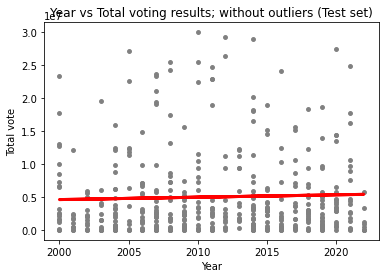

In [38]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Year vs Total voting results; without outliers (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Total vote')
plot_test.show()

In [39]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,233014,5.251186e+06
1,4110117,5.215188e+06
2,12197159,4.747219e+06
3,19594199,4.711221e+06
4,1395103,4.747219e+06
5,5590132,4.819214e+06
6,1836059,5.287184e+06
7,3973017,5.359179e+06
8,6111210,4.891209e+06
9,7995022,4.963205e+06


the slope, MSE and R2 show that we have a negative relationship between the year and the total vote. Visually we can see a slight increase in the late years but still flat.

since to run the regression test i had to fill the missing data with 0s, this changed the data points in this study. I still think further analysis is needed to see the total votes per country per year.